# Complex Signals


In [1]:
from causalinfo import *

In [2]:
# You only need this if you want to draw pretty pictures of the Networks
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'

In [3]:
c1, c2, s1, s2, s3, s4, a1 = make_variables('c1 c2 s1 s2 s3 s4 a1', 2)

In [4]:
eq1 = Equation('SAME', [c1], [s1], equations.same_)
eq2 = Equation('SAMEB', [c2], [s2, s3], equations.branch_same_)
eq3 = Equation('AND', [s1, s2], [s4], equations.and_)
eq4 = Equation('OR', [s3, s4], [a1], equations.or_)

In [5]:
net = CausalGraph([eq1, eq2, eq3, eq4])

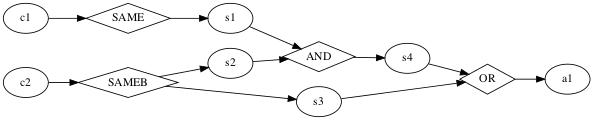

In [6]:
draw(net.full_network)

In [7]:
j_observe = net.generate_joint(UniformDist(c1, c2))
j_observe

In [9]:
print(j_observe.mutual_info(s1, a1))
print(j_observe.mutual_info(s2, a1))
print(j_observe.mutual_info(s3, a1))
print(j_observe.mutual_info(s4, a1))

0.0
1.0
1.0
0.31127812445913294


In [11]:
j_do_s2 = net.generate_joint(UniformDist(c1, c2), UniformDist(s2))
print(j_do_s2.mutual_info(s2, a1))
j_do_s2

0.04879494069539869


In [12]:
print(j_do_s2.mutual_info(s1, a1))
print(j_do_s2.mutual_info(s2, a1))
print(j_do_s2.mutual_info(s3, a1))
print(j_do_s2.mutual_info(s4, a1))

0.04879494069539869
0.04879494069539869
0.5487949406953987
0.20443400292496494


In [14]:
j_do_s3 = net.generate_joint(UniformDist(c1, c2), UniformDist(s3))
print(j_do_s3.mutual_info(s3, a1))
j_do_s3

0.5487949406953987


In [15]:
print(j_do_s3.mutual_info(s1, a1))
print(j_do_s3.mutual_info(s2, a1))
print(j_do_s3.mutual_info(s3, a1))
print(j_do_s3.mutual_info(s4, a1))

0.04879494069539869
0.04879494069539869
0.5487949406953987
0.20443400292496494


In [16]:
j_do_s1 = net.generate_joint(UniformDist(c1, c2), UniformDist(s1))
j_do_s1

In [17]:
print(j_do_s1.mutual_info(s1, a1))
print(j_do_s1.mutual_info(s2, a1))
print(j_do_s1.mutual_info(s3, a1))
print(j_do_s1.mutual_info(s4, a1, c2))

0.0
1.0
1.0
0.0


In [18]:
j_do_s1.joint(s1, a1)

In [19]:
j_do_s2.joint(s1, a1)

In [20]:
j_observe.joint(s4)

,Pr
s4,
0,0.75
1,0.25
